In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

Load DATASET

In [84]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])
print(X_train,y_train)

[[0.5 1.5]
 [1.  1. ]
 [1.5 0.5]
 [3.  0.5]
 [2.  2. ]
 [1.  2.5]] [0 0 0 1 1 1]


Visual Representation

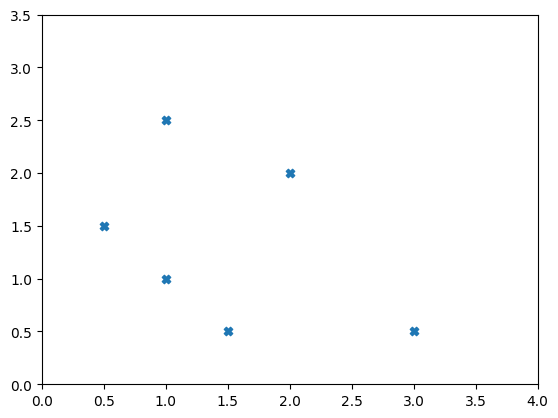

In [100]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.axis([0,4,0,3.5])
ax.scatter(X_train[:,0],X_train[:,1],marker="X")
plt.show()

Sigmoid Function

In [86]:
def sigmoid_function(z):
    exp_i = np.exp(-z)
    sigmoid_z = 1/(1+exp_i)
    return sigmoid_z

In [87]:
def compute_gradient_logistic(X,y,w,b):
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    for i in range(m):
        f_wb_i = sigmoid_function(np.dot(X[i],w) + b)
        err_i = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] += err_i * X[i][j]
        dj_db += err_i 
    dj_dw = dj_dw/m
    dj_db = dj_db/m

    return dj_dw,dj_db

In [88]:
def compute_cost_logistic(X,y,w,b):
    m,n= X.shape
    cost = 0.0
    for i in range(m):
        z_cl = (np.dot(X[i],w) + b)
        f_wb_i_cl = sigmoid_function(z_cl)
        cost += -y[i] * np.log(f_wb_i_cl) - (1-y[i]) * np.log(1-f_wb_i_cl)
    cost = cost/m
    return cost

In [89]:
def gradient_descent(X,y,w_in,b_in,iters,alpha):
    w = w_in
    b = b_in
    J_history = []

    for i in range(iters):
        dj_dw,dj_db = compute_gradient_logistic(X_train,y_train,w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if(i<10000):
            J_history.append(compute_cost_logistic(X_train,y_train,w,b))
        if(i%1000 == 0):
            print(f"Iteration: {i:4d}  cost: {J_history[-1]}")
    return w,b 
    

In [90]:
w_tmp = np.zeros_like(X_train[0])
b_tmp = 0.
alpha = 0.1
iters = 10000
w_final,b_final = gradient_descent(X_train,y_train,w_tmp,b_tmp,iters,alpha)
print(f"w: {w_final} b: {b_final}")


Iteration:    0  cost: 0.684610468560574
Iteration: 1000  cost: 0.1590977666870457
Iteration: 2000  cost: 0.08460064176930078
Iteration: 3000  cost: 0.05705327279402531
Iteration: 4000  cost: 0.04290759421682
Iteration: 5000  cost: 0.03433847729884557
Iteration: 6000  cost: 0.02860379802212006
Iteration: 7000  cost: 0.02450156960879306
Iteration: 8000  cost: 0.02142370332569295
Iteration: 9000  cost: 0.019030137124109114
w: [5.28123029 5.07815608] b: -14.222409982019837


In [4]:
a = [2,3,6]
print(np.square(a[1]))

[ 4  9 36]
